In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import xarray as xr

from osgeo import gdal
#from gistool import rasterize
import pyhdf
from pyhdf.SD import SD
import geopandas as gpd

from scipy import stats
from scipy import integrate
from numpy import exp
import math
from pymannkendall import original_test as mk


import matplotlib as mpl
import matplotlib.pyplot as plt
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.ticker as mticker

import rioxarray as rxr

## pre-process

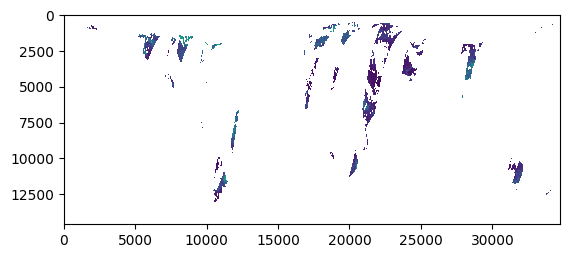

In [2]:
tif = gdal.Open('/portal1/dell/li-b/SMAP/SM_2016_1/NSIDC-0779_EASE2_G1km_SMAP_SM_DS_20161025.tif')
arr=tif.ReadAsArray()[0]
plt.imshow(arr)
plt.show()

In [3]:
transform = tif.GetGeoTransform()
transform
# projection = tif.GetProjection()
# projection

(-17367530.44516138,
 1000.89502334956,
 0.0,
 7314540.79258289,
 0.0,
 -1000.89502334956)

In [4]:
d1 = rxr.open_rasterio('/portal1/dell/li-b/SMAP/SM_2016_1/NSIDC-0779_EASE2_G1km_SMAP_SM_DS_20161025.tif').to_dataset(name='SM')
d1

<xarray.Dataset>
Dimensions:      (band: 2, x: 34704, y: 14616)
Coordinates:
  * band         (band) int64 1 2
  * x            (x) float64 -1.737e+07 -1.737e+07 ... 1.737e+07 1.737e+07
  * y            (y) float64 7.314e+06 7.313e+06 ... -7.313e+06 -7.314e+06
    spatial_ref  int64 0
Data variables:
    SM           (band, y, x) float32 ...

In [49]:
newlon = np.linspace(110.5,122,1099)
newlat = np.linspace(34,24.5,1058)

In [4]:
x_min = 10671381
x_max = 11771327
y_max = 4093104
y_min = 3033497

In [28]:
files = sorted(glob.glob('/portal1/dell/li-b/SMAP/SM_2020_1/*.tif'))
# files[0][47:54]
files[0][67:75]

'20200908'

In [29]:
datasets = xr.Dataset(coords={'band': []})
for f in files:
    filename = str(f[67:75])
    ds0 = rxr.open_rasterio(f).to_dataset(name='SM')
    ds1 = ds0['SM'].sel(x=slice(x_min, x_max), y=slice(y_max, y_min)).to_dataset(name='SM')
    ds2 = ds1['SM'].mean(dim='band').expand_dims(band=[1]).to_dataset(name='SM')    #average two bands
    datasets = xr.concat([datasets, ds2], dim='band')
    print(filename)
    
# 将 'band' 维度修改为 'date'
date = pd.date_range('2020-09-08', '2020-12-31', freq='D')
datasets = datasets.assign_coords(band=date)
datasets = datasets.rename({'band': 'date'})
datasets.to_netcdf('/portal1/dell/li-b/SMAP/SM2020_1.nc')

20200908
20200909
20200910
20200911
20200912
20200913
20200914
20200915
20200916
20200917
20200918
20200919
20200920
20200921
20200922
20200923
20200924
20200925
20200926
20200927
20200928
20200929
20200930
20201001
20201002
20201003
20201004
20201005
20201006
20201007
20201008
20201009
20201010
20201011
20201012
20201013
20201014
20201015
20201016
20201017
20201018
20201019
20201020
20201021
20201022
20201023
20201024
20201025
20201026
20201027
20201028
20201029
20201030
20201031
20201101
20201102
20201103
20201104
20201105
20201106
20201107
20201108
20201109
20201110
20201111
20201112
20201113
20201114
20201115
20201116
20201117
20201118
20201119
20201120
20201121
20201122
20201123
20201124
20201125
20201126
20201127
20201128
20201129
20201130
20201201
20201202
20201203
20201204
20201205
20201206
20201207
20201208
20201209
20201210
20201211
20201212
20201213
20201214
20201215
20201216
20201217
20201218
20201219
20201220
20201221
20201222
20201223
20201224
20201225
20201226
20201227
2

In [5]:
sm15 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2015.nc')
sm16 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2016.nc')
sm16_1 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2016_1.nc')
sm17 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2017.nc')
sm18 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2018.nc')
sm18_1 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2018_1.nc')
sm19 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2019.nc')
sm20 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2020.nc')
sm20_1 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2020_1.nc')
sm21 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2021.nc')
sm22 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM2022.nc')

In [6]:
sm_all = xr.concat([sm15, sm16, sm16_1, sm17, sm18, sm18_1, sm19, sm20, sm20_1, sm21, sm22], dim='date')
sm_all.to_netcdf('/portal1/dell/li-b/SMAP/SM_all.nc')

/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [3]:
ds0['vari'].sel(time='2022-07-31').to_dataset(name='vari').to_netcdf('/portal1/dell/li-b/SMAP/template.nc')

## regional mean

In [2]:
ds0 = xr.open_dataset('/portal1/dell/li-b/SMAP/SM_all_0.05.nc')

# exclude taiwan(120.5,122)(24.5,25.5) 
arr = ds0['vari'].values.copy()
arr[:,169:,200:] = np.nan
ds00 = xr.Dataset({'vari': (['time','lat','lon'], arr)},
                      coords={'time': (['time'], ds0.time.values), 
                              'lat': (['lat'], ds0.lat.values),
                      'lon': (['lon'], ds0.lon.values),})

In [4]:
ds1 = ds00.resample(time='M').mean(skipna=True)
ds1.to_netcdf('/portal1/dell/li-b/multiregression/sm1.nc')

/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [4]:
###### 2022 should be excluded when calculating the anomaly for time series is not long enough to detrend
def cal_month_ano_aver(ds1, mon):
    ds_m0 = ds1.sel(time=ds1['time.month'].isin([mon]))
    ds_m = ds_m0['vari'].values

    anos = np.zeros_like(ds_m)
    for i in range(0,ds_m.shape[2]):
        for j in range(0,ds_m.shape[1]):
            v1 = ds_m[:,j,i]
            anos[:,j,i] = v1 - v1[0:7].mean() # cal ano exclude 2022
                
    ds_ano = xr.Dataset({'vari': (['time','lat','lon'], anos)},
                        coords={'time': (['time'], ds_m0.time.values), 
                                'lat': (['lat'], ds_m0.lat.values),
                        'lon': (['lon'], ds_m0.lon.values),})
    return ds_ano

In [5]:
def cal_3month_ano_aver(ds1, mon1, mon2, mon3):
    ds_m0 = ds1.sel(time=ds1['time.month'].isin([mon1, mon2, mon3]))
    ds_m1 = ds_m0.groupby('time.year').mean(dim='time',skipna=True)
    ds_m = ds_m1['vari'].values

    anos = np.zeros_like(ds_m)
    for i in range(0,ds_m.shape[2]):
        for j in range(0,ds_m.shape[1]):
            v1 = ds_m[:,j,i]
            anos[:,j,i] = v1 - v1[0:7].mean() # cal ano exclude 2022
                
    ds_ano = xr.Dataset({'vari': (['time','lat','lon'], anos)},
                        coords={'time': (['time'], ds_ano7.time.values), 
                                'lat': (['lat'], ds_m0.lat.values),
                        'lon': (['lon'], ds_m0.lon.values),})
    return ds_ano

In [6]:
ds_ano6 = cal_month_ano_aver(ds1, 6)
ds_ano7 = cal_month_ano_aver(ds1, 7)
ds_ano8 = cal_month_ano_aver(ds1, 8)
ds_ano9 = cal_month_ano_aver(ds1, 9)
ds_ano789 = cal_3month_ano_aver(ds1, 7, 8, 9)

/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [7]:
ds_ano789.to_netcdf('/portal1/dell/li-b/multiregression/sm.nc')

In [17]:
c6 = ds_ano6['vari'].mean(dim=['lat','lon'],skipna=True).values
c7 = ds_ano7['vari'].mean(dim=['lat','lon'],skipna=True).values
c8 = ds_ano8['vari'].mean(dim=['lat','lon'],skipna=True).values
c9 = ds_ano9['vari'].mean(dim=['lat','lon'],skipna=True).values
c789 = ds_ano789['vari'].mean(dim=['lat','lon'],skipna=True).values
times = pd.date_range('2015','2023',freq='Y')
df1 = pd.DataFrame({'time':times,'jun_ano':c6, 'jul_ano':c7,'agu_ano':c8,'sep_ano':c9,'jas_ano':c789})
df1

,time,jun_ano,jul_ano,agu_ano,sep_ano,jas_ano
0,2015-12-31,0.002814,0.012797,-0.007760,-0.001362,0.001470
1,2016-12-31,0.006311,0.002857,-0.013165,-0.005768,-0.005094
2,2017-12-31,0.005095,-0.012558,0.009955,0.008649,0.002113
3,2018-12-31,-0.021311,-0.006554,0.009368,0.008722,0.004044
4,2019-12-31,-0.006918,-0.012668,-0.009851,-0.029688,-0.017537
5,2020-12-31,-0.009514,0.012987,-0.005095,0.010797,0.005774
6,2021-12-31,0.023523,0.003139,0.016548,0.008651,0.009231
7,2022-12-31,0.026034,-0.012984,-0.030235,-0.062151,-0.034582


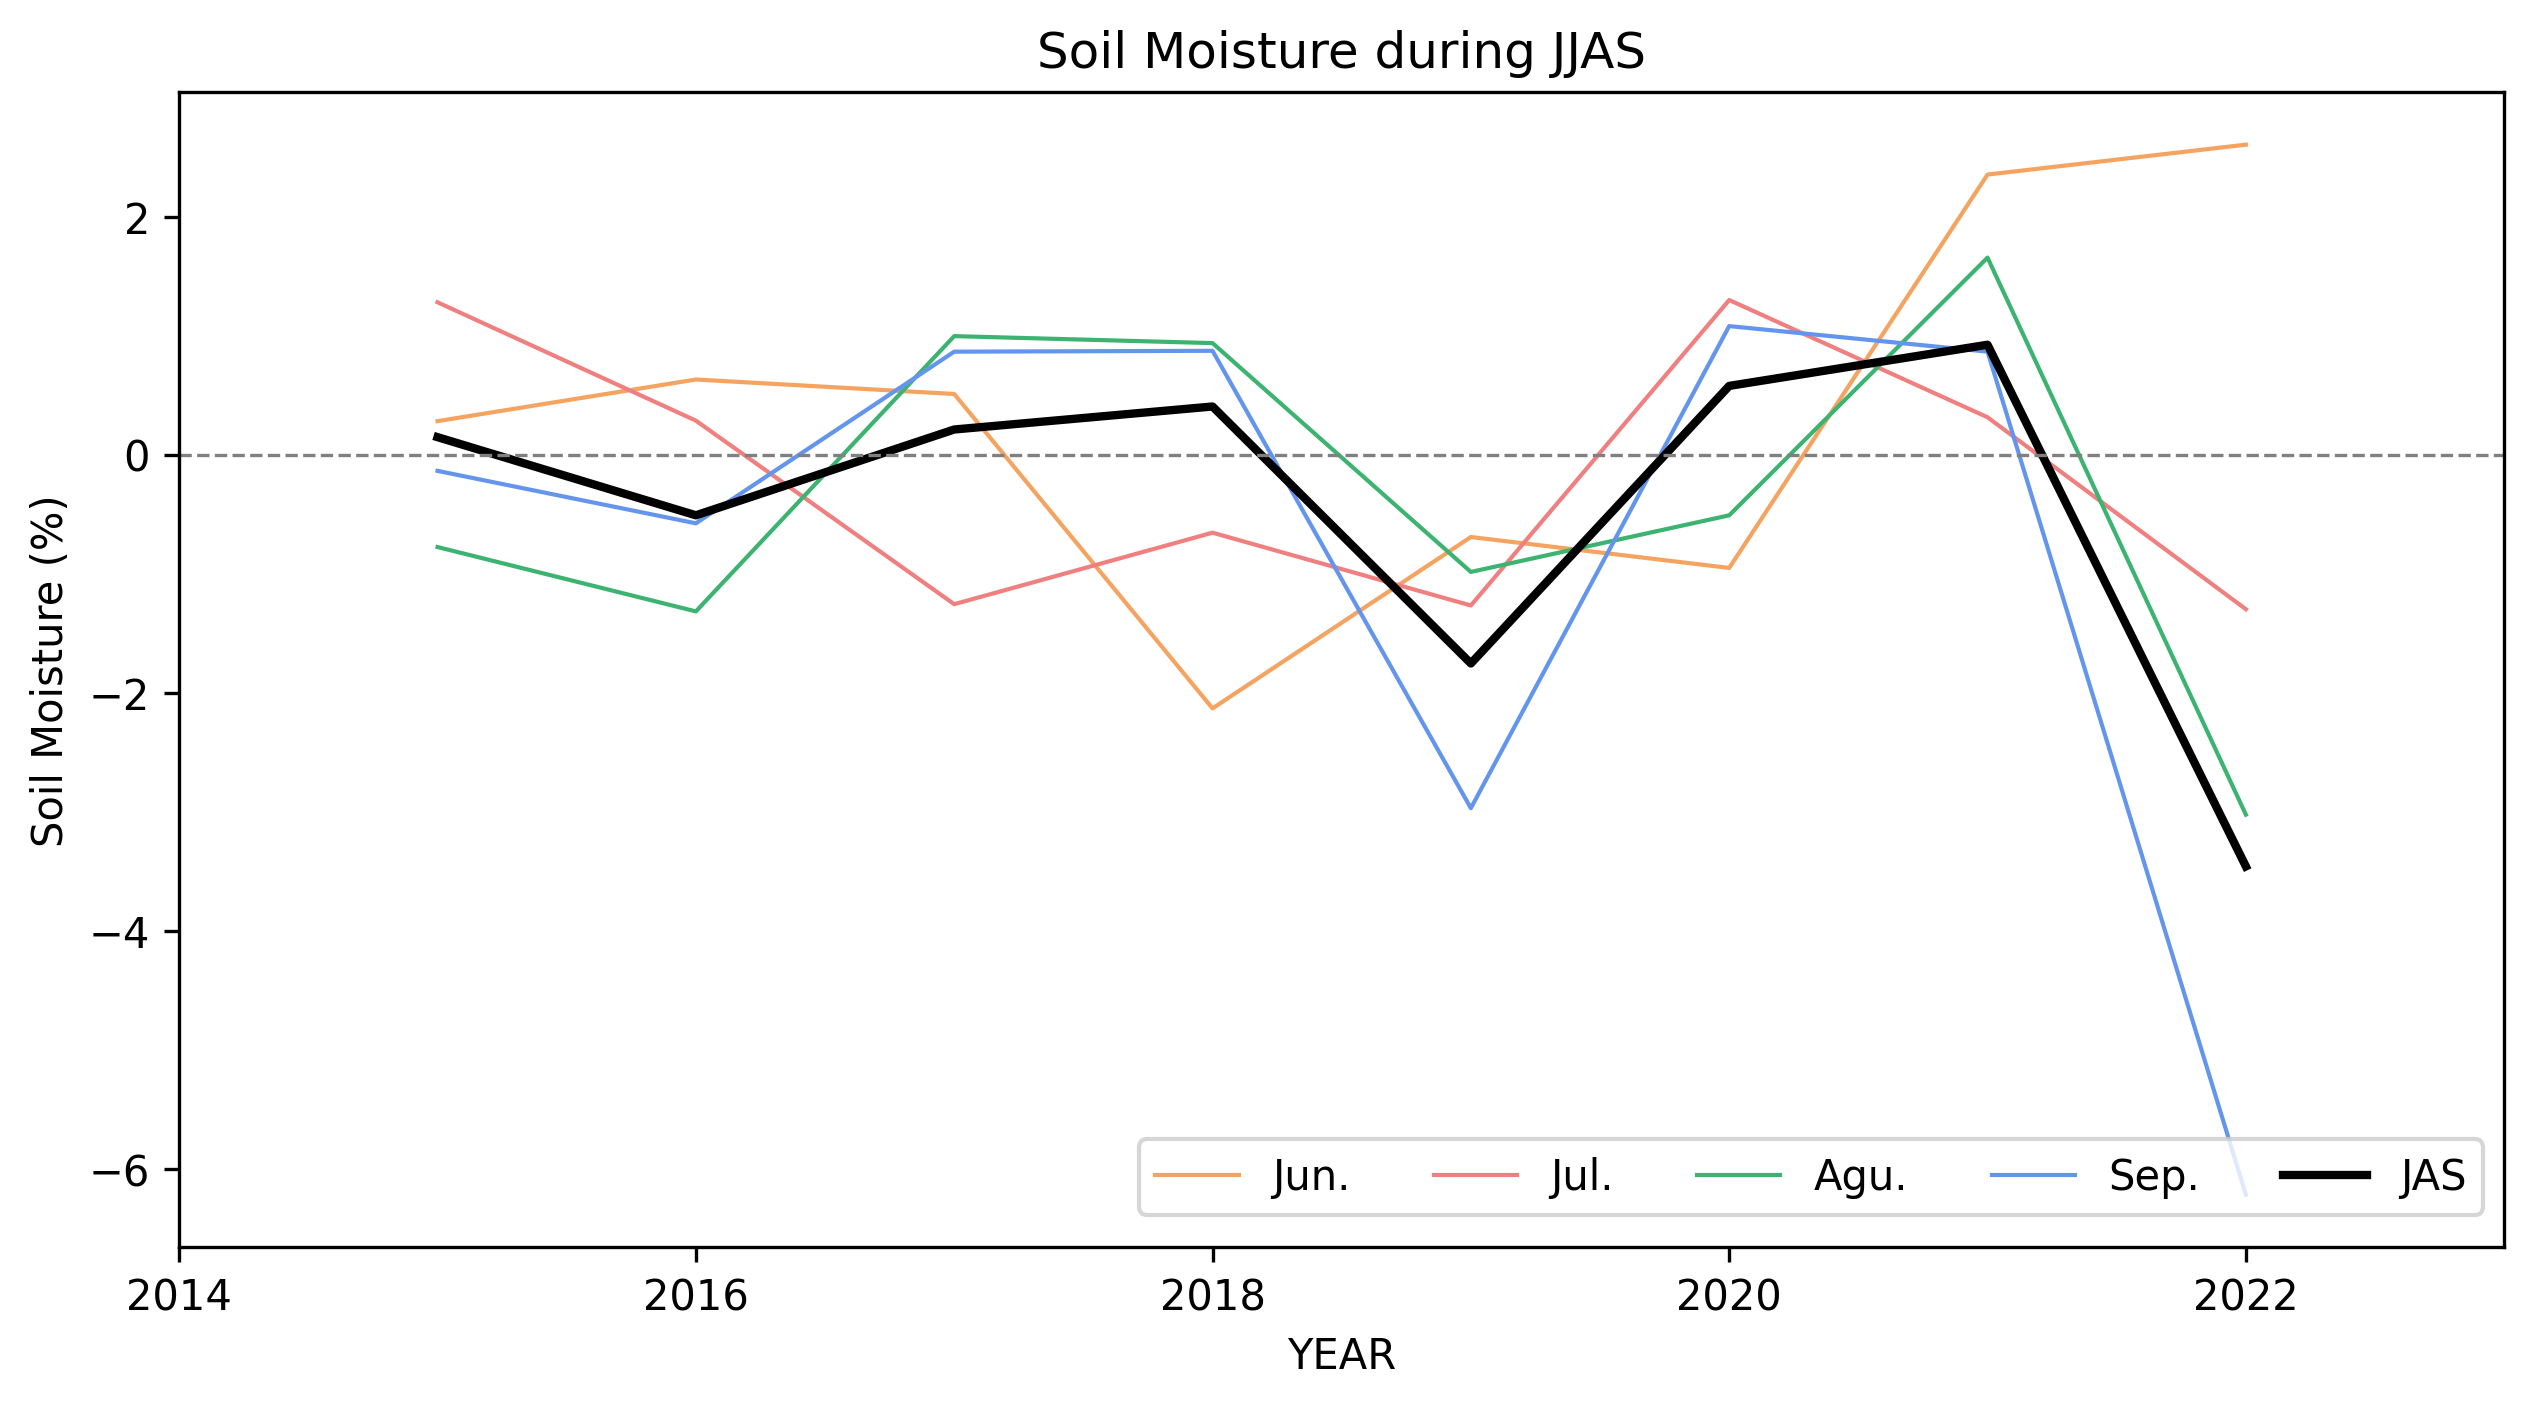

In [18]:
date = np.arange(2015,2023)

v1 = df1['jun_ano']*100
v2 = df1['jul_ano']*100
v3 = df1['agu_ano']*100
v4 = df1['sep_ano']*100
v5 = df1['jas_ano']*100

fig, ax = plt.subplots(1,1,dpi=300,figsize=(10,5))

ax.plot(date, v1,color='sandybrown',lw=1, ls='-', label='Jun.')
ax.plot(date, v2,color='lightcoral',lw=1, ls='-', label='Jul.')
ax.plot(date, v3,color='mediumseagreen',lw=1, ls='-', label='Agu.')
ax.plot(date, v4,color='cornflowerblue',lw=1, ls='-', label='Sep.')
ax.plot(date, v5,color='black',lw=2, ls='-', label='JAS')

ax.set_ylabel('Soil Moisture (%)')
#ax1.set_ylabel('PRR (%)')
ax.set_xlabel('YEAR')
custom_ticks = np.arange(2002, 2023, step=2)  # Define the tick locations
custom_tick_labels = [str(year) for year in custom_ticks]  # Define the tick labels

ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_tick_labels)

ax.axhline(y=0, color='gray', linestyle='--', lw=0.8)
    
#figname = filename.replace('.txt','')
ax.set_title('Soil Moisture during JJAS')
ax.set_xlim(date[0]-1, date[-1]+1)
fig.legend(loc="lower right", bbox_to_anchor=(1, 0.01), bbox_transform=ax.transAxes, ncol = 5)

#plt.savefig('D:/rice/figs/middleyield.png')                         
plt.show()

## violin plot

In [20]:
d6_0 = ds_ano6['vari'].sel(time='2022-06-30').values*100
box6 = d6_0[~np.isnan(d6_0)].ravel()

d7_0 = ds_ano7['vari'].sel(time='2022-07-31').values*100
box7 = d7_0[~np.isnan(d7_0)].ravel()

d8_0 = ds_ano8['vari'].sel(time='2022-08-31').values*100
box8 = d8_0[~np.isnan(d8_0)].ravel()

d9_0 = ds_ano9['vari'].sel(time='2022-09-30').values*100
box9 = d9_0[~np.isnan(d9_0)].ravel()

d789_0 = ds_ano789['vari'].sel(time='2022-07-31').values*100
box789 = d789_0[~np.isnan(d789_0)].ravel()

box = [box6,box7,box8,box9,box789]
for i in box:
    lo = np.nanpercentile(i,q=25)
    up = np.nanpercentile(i,q=75)
    upbo = up+1.5*(up-lo)
    lobo = lo-1.5*(up-lo)
    maxmum = i.max()
    minmum = i.min()
    print(upbo, lobo, maxmum, minmum)

17.995944172143936 -12.33534488081932 19.589945 -31.781466
19.445849776268005 -22.273288369178772 23.368277 -28.892847
14.975910127162933 -21.38458877801895 41.559296 -34.74097
5.8840347826480865 -18.174852937459946 27.100008 -34.521008
10.034446701407433 -17.0391658693552 16.841824 -29.101038


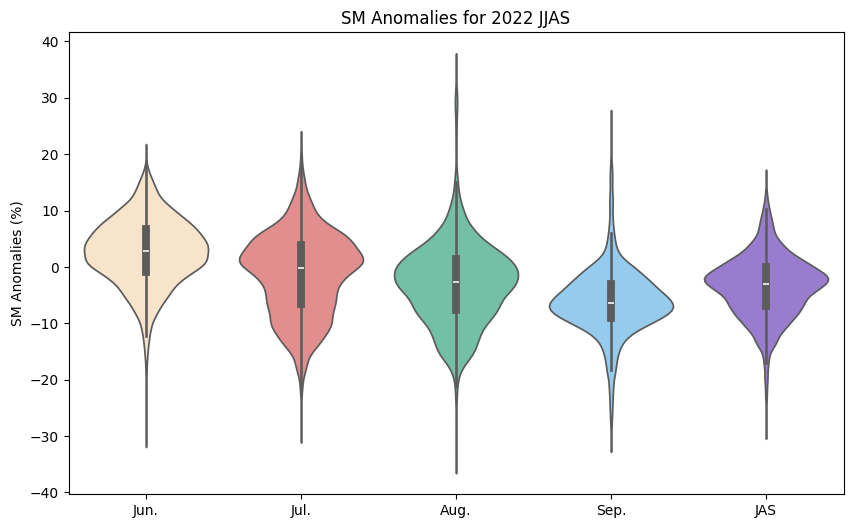

In [64]:
import seaborn as sns

data_to_plot = [box6, box7, box8, box9, box789]
custom_palette = ["bisque", "lightcoral", "mediumaquamarine", "lightskyblue", "mediumpurple"]
# Create a violin plot for all datasets in one figure
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_to_plot, palette=custom_palette, inner='box')

# Customize the plot as needed
plt.title('SM Anomalies for 2022 JJAS')
# plt.xlabel('Datasets')
plt.ylabel('SM Anomalies (%)')
custom_labels = ['Jun.', 'Jul.', 'Aug.', 'Sep.', 'JAS']
plt.xticks(range(len(custom_labels)), custom_labels)
# Show the plot
plt.show()

Text(0, 0.5, 'Soil Moisture Anomalies (%)')

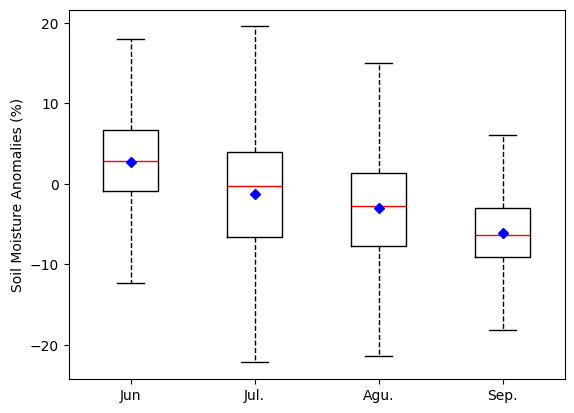

In [40]:
plt.boxplot([box6,box7,box8,box9],labels=['Jun','Jul.','Agu.','Sep.'], sym='o', whis=1.5, meanline=False, showmeans=True, showcaps=True, showbox=True, showfliers=False, medianprops={'linestyle':'-', 'color':'red'}, meanprops={'marker':'D', 'markerfacecolor':'blue', 'markersize':5,'markeredgecolor':'blue'}, boxprops={'color':'black'}, whiskerprops={'linestyle':'--', 'color':'black'})
plt.ylabel('Soil Moisture Anomalies (%)')

## spatial

/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, '2022 Jun. SM Anomalies')

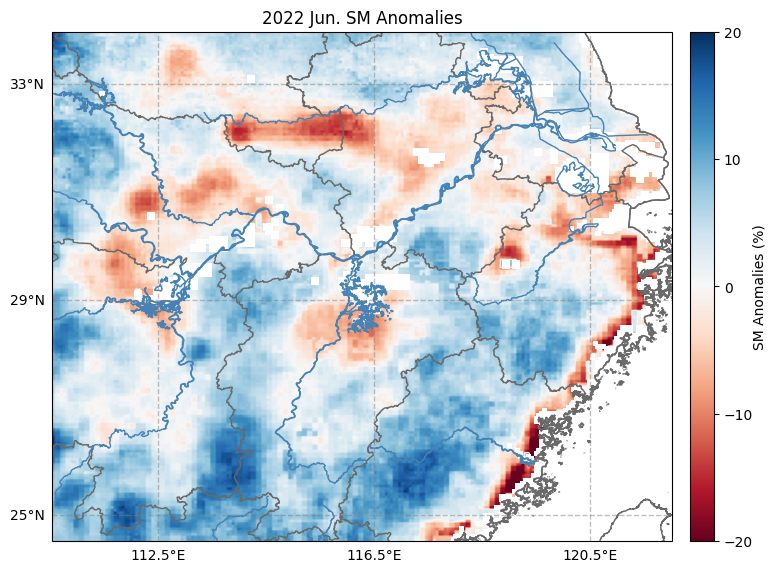

In [21]:
data = ds_ano6['vari'][7,:,:].values
# arr_flipped = np.flip(data, axis=0)
arr_flipped = data*100

gdf1 = gpd.read_file('/portal1/dell/li-b/meteo/bound.shp')
gdf2 = gpd.read_file('/portal1/dell/li-b/meteo/allrivers.shp')
latitude, longitude = ds_ano6.lat.values, ds_ano6.lon.values

projection = ccrs.PlateCarree()

vmax=20
vmin=-20
cmap = plt.get_cmap('RdBu')


fig, ax = plt.subplots(figsize=(8,10),subplot_kw={'projection': ccrs.PlateCarree()})

gdf1.plot(ax=ax, facecolor='none', edgecolor='dimgray', linewidth=1)
gdf2.plot(ax=ax, facecolor='none', edgecolor='steelblue', linewidth=1)
img = ax.imshow(arr_flipped, extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()],
                transform=projection,
                cmap=cmap,
                vmax=vmax,
                vmin=vmin)

ticks = list(np.linspace(vmin, vmax, 5))
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
pos = ax.get_position()
pad = 0.015*1.5
width = 0.015*2
clen = 0.6
cax = fig.add_axes([pos.xmax + pad, pos.ymin, width, (pos.ymax - pos.ymin)])
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, extend='neither', orientation='vertical')
cbar.ax.set_ylabel('SM Anomalies (%)')
cbar.set_ticks(ticks)
# Adjust the distance between colorbar label and colorbar
labelpad = 0.001  # Adjust this value as needed
cbar.ax.yaxis.labelpad = labelpad

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([112.5,116.5,120.5])
gl.ylocator = mticker.FixedLocator([25,29,33])

ax.set_title('2022 Jun. SM Anomalies')

/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, '2022 Jul. SM Anomalies')

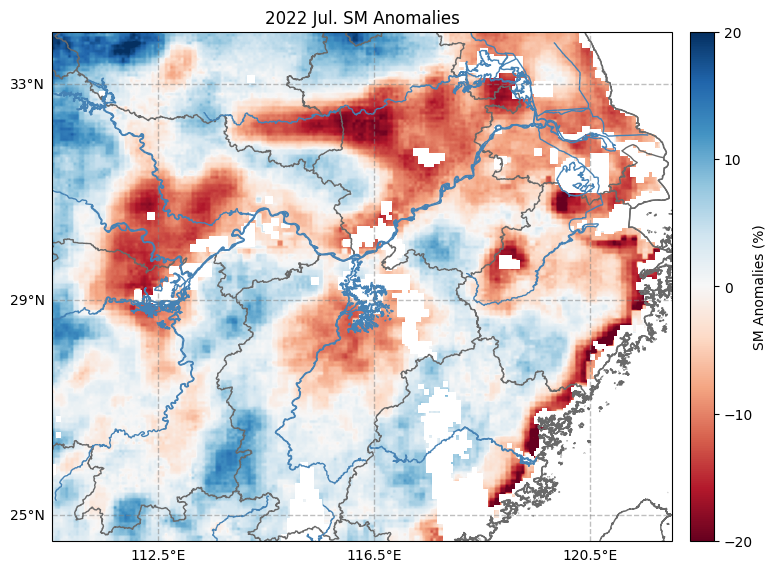

In [22]:
data = ds_ano7['vari'][7,:,:].values
# arr_flipped = np.flip(data, axis=0)
arr_flipped = data*100

gdf1 = gpd.read_file('/portal1/dell/li-b/meteo/bound.shp')
gdf2 = gpd.read_file('/portal1/dell/li-b/meteo/allrivers.shp')
latitude, longitude = ds_ano6.lat.values, ds_ano6.lon.values

projection = ccrs.PlateCarree()

vmax=20
vmin=-20
cmap = plt.get_cmap('RdBu')


fig, ax = plt.subplots(figsize=(8,10),subplot_kw={'projection': ccrs.PlateCarree()})

gdf1.plot(ax=ax, facecolor='none', edgecolor='dimgray', linewidth=1)
gdf2.plot(ax=ax, facecolor='none', edgecolor='steelblue', linewidth=1)
img = ax.imshow(arr_flipped, extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()],
                transform=projection,
                cmap=cmap,
                vmax=vmax,
                vmin=vmin)

ticks = list(np.linspace(vmin, vmax, 5))
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
pos = ax.get_position()
pad = 0.015*1.5
width = 0.015*2
clen = 0.6
cax = fig.add_axes([pos.xmax + pad, pos.ymin, width, (pos.ymax - pos.ymin)])
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, extend='neither', orientation='vertical')
cbar.ax.set_ylabel('SM Anomalies (%)')
cbar.set_ticks(ticks)
# Adjust the distance between colorbar label and colorbar
labelpad = 0.001  # Adjust this value as needed
cbar.ax.yaxis.labelpad = labelpad

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([112.5,116.5,120.5])
gl.ylocator = mticker.FixedLocator([25,29,33])

ax.set_title('2022 Jul. SM Anomalies')

/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, '2022 Aug. SM Anomalies')

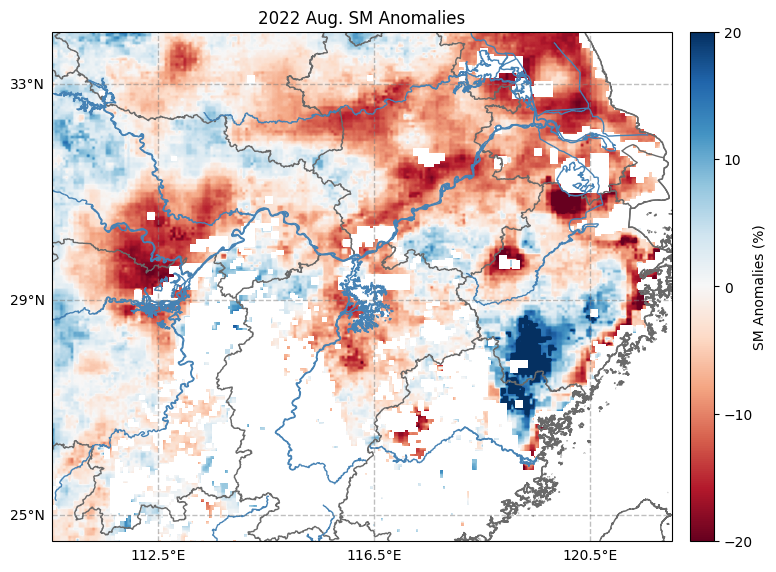

In [23]:
data = ds_ano8['vari'][7,:,:].values
# arr_flipped = np.flip(data, axis=0)
arr_flipped = data*100

gdf1 = gpd.read_file('/portal1/dell/li-b/meteo/bound.shp')
gdf2 = gpd.read_file('/portal1/dell/li-b/meteo/allrivers.shp')
latitude, longitude = ds_ano6.lat.values, ds_ano6.lon.values

projection = ccrs.PlateCarree()

vmax=20
vmin=-20
cmap = plt.get_cmap('RdBu')


fig, ax = plt.subplots(figsize=(8,10),subplot_kw={'projection': ccrs.PlateCarree()})

gdf1.plot(ax=ax, facecolor='none', edgecolor='dimgray', linewidth=1)
gdf2.plot(ax=ax, facecolor='none', edgecolor='steelblue', linewidth=1)
img = ax.imshow(arr_flipped, extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()],
                transform=projection,
                cmap=cmap,
                vmax=vmax,
                vmin=vmin)

ticks = list(np.linspace(vmin, vmax, 5))
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
pos = ax.get_position()
pad = 0.015*1.5
width = 0.015*2
clen = 0.6
cax = fig.add_axes([pos.xmax + pad, pos.ymin, width, (pos.ymax - pos.ymin)])
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, extend='neither', orientation='vertical')
cbar.ax.set_ylabel('SM Anomalies (%)')
cbar.set_ticks(ticks)
# Adjust the distance between colorbar label and colorbar
labelpad = 0.001  # Adjust this value as needed
cbar.ax.yaxis.labelpad = labelpad

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([112.5,116.5,120.5])
gl.ylocator = mticker.FixedLocator([25,29,33])

ax.set_title('2022 Aug. SM Anomalies')

/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, '2022 Sep. SM Anomalies')

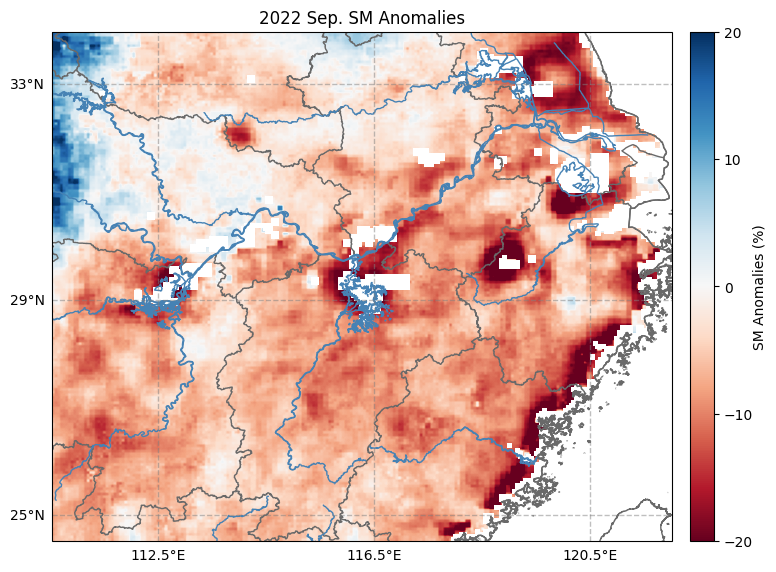

In [24]:
data = ds_ano9['vari'][7,:,:].values
# arr_flipped = np.flip(data, axis=0)
arr_flipped = data*100

gdf1 = gpd.read_file('/portal1/dell/li-b/meteo/bound.shp')
gdf2 = gpd.read_file('/portal1/dell/li-b/meteo/allrivers.shp')
latitude, longitude = ds_ano6.lat.values, ds_ano6.lon.values

projection = ccrs.PlateCarree()

vmax=20
vmin=-20
cmap = plt.get_cmap('RdBu')


fig, ax = plt.subplots(figsize=(8,10),subplot_kw={'projection': ccrs.PlateCarree()})

gdf1.plot(ax=ax, facecolor='none', edgecolor='dimgray', linewidth=1)
gdf2.plot(ax=ax, facecolor='none', edgecolor='steelblue', linewidth=1)
img = ax.imshow(arr_flipped, extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()],
                transform=projection,
                cmap=cmap,
                vmax=vmax,
                vmin=vmin)

ticks = list(np.linspace(vmin, vmax, 5))
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
pos = ax.get_position()
pad = 0.015*1.5
width = 0.015*2
clen = 0.6
cax = fig.add_axes([pos.xmax + pad, pos.ymin, width, (pos.ymax - pos.ymin)])
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, extend='neither', orientation='vertical')
cbar.ax.set_ylabel('SM Anomalies (%)')
cbar.set_ticks(ticks)
# Adjust the distance between colorbar label and colorbar
labelpad = 0.001  # Adjust this value as needed
cbar.ax.yaxis.labelpad = labelpad

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([112.5,116.5,120.5])
gl.ylocator = mticker.FixedLocator([25,29,33])

ax.set_title('2022 Sep. SM Anomalies')

/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/li-b/.conda/envs/lbn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, '2022 JAS SM Anomalies')

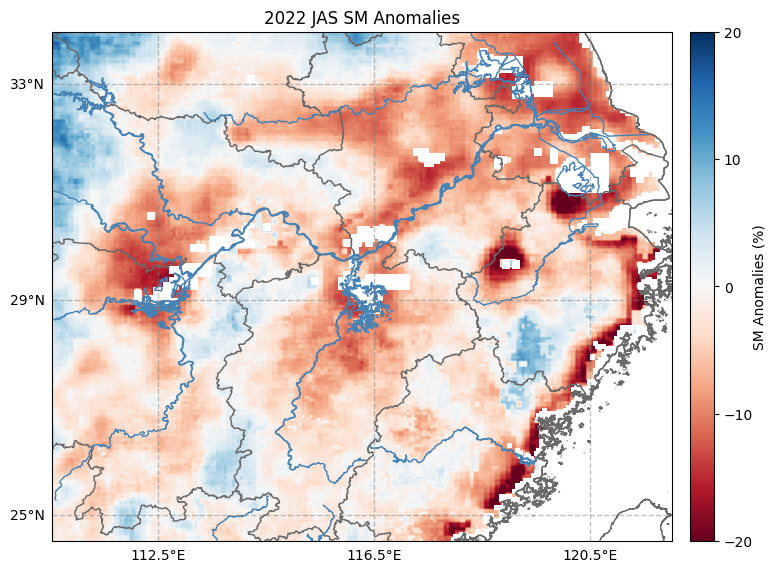

In [26]:
data = ds_ano789['vari'][7,:,:].values
# arr_flipped = np.flip(data, axis=0)
arr_flipped = data*100

gdf1 = gpd.read_file('/portal1/dell/li-b/meteo/bound.shp')
gdf2 = gpd.read_file('/portal1/dell/li-b/meteo/allrivers.shp')
latitude, longitude = ds_ano789.lat.values, ds_ano789.lon.values

projection = ccrs.PlateCarree()

vmax=20
vmin=-20
cmap = plt.get_cmap('RdBu')


fig, ax = plt.subplots(figsize=(8,10),subplot_kw={'projection': ccrs.PlateCarree()})

gdf1.plot(ax=ax, facecolor='none', edgecolor='dimgray', linewidth=1)
gdf2.plot(ax=ax, facecolor='none', edgecolor='steelblue', linewidth=1)
img = ax.imshow(arr_flipped, extent=[longitude.min(), longitude.max(), latitude.min(), latitude.max()],
                transform=projection,
                cmap=cmap,
                vmax=vmax,
                vmin=vmin)


ticks = list(np.linspace(vmin, vmax, 5))
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
pos = ax.get_position()
pad = 0.015*1.5
width = 0.015*2
clen = 0.6
cax = fig.add_axes([pos.xmax + pad, pos.ymin, width, (pos.ymax - pos.ymin)])
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, extend='neither', orientation='vertical')
cbar.ax.set_ylabel('SM Anomalies (%)')
cbar.set_ticks(ticks)
# Adjust the distance between colorbar label and colorbar
labelpad = 0.001  # Adjust this value as needed
cbar.ax.yaxis.labelpad = labelpad

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([112.5,116.5,120.5])
gl.ylocator = mticker.FixedLocator([25,29,33])

ax.set_title('2022 JAS SM Anomalies')